### Mean Squared Error (MSE) Loss Function
 
The **Mean Squared Error (MSE)** measures the average squared difference between actual target values $(y_i)$ and predicted values $(\hat{y}_i)$:
 
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 
$$
 
### Deriving the Gradient of MSE with Respect to $ \mathbf{w} $ 
1. **Expressing MSE in Matrix Form:**
 
$$
\text{MSE} = \frac{1}{n} (\mathbf{y} - \mathbf{\hat{y}})^\top (\mathbf{y} - \mathbf{\hat{y}})
$$

Substituting $\mathbf{\hat{y}} = \mathbf{Xw}$:
 
$$
\text{MSE} = \frac{1}{n} (\mathbf{y} - \mathbf{Xw})^\top (\mathbf{y} - \mathbf{Xw})
$$

1. **Differentiation Step-by-Step:**

- **Expand the Expression:**
 
$$
\text{MSE} = \frac{1}{n} \left[\mathbf{y}^\top \mathbf{y} - \mathbf{y}^\top \mathbf{Xw} - \mathbf{w}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{w}^\top \mathbf{X}^\top \mathbf{Xw}\right]
$$

- **Differentiating Each Term:**

- $\frac{\partial}{\partial \mathbf{w}}(\mathbf{y}^\top \mathbf{y}) = 0$
- $\frac{\partial}{\partial \mathbf{w}}(-2\mathbf{w}^\top \mathbf{X}^\top \mathbf{y}) = -2\mathbf{X}^\top \mathbf{y}$
- $\frac{\partial}{\partial \mathbf{w}}(\mathbf{w}^\top \mathbf{X}^\top \mathbf{Xw}) = 2\mathbf{X}^\top \mathbf{Xw}$

- **Combine the Derivatives:**

$$
\nabla_{\mathbf{w}}\text{MSE} = \frac{1}{n} \left[0 - 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{Xw}\right]
$$
 
Simplifies to:

$$
\nabla_{\mathbf{w}}\text{MSE} = \frac{2}{n} \mathbf{X}^\top (\mathbf{Xw} - \mathbf{y})
$$

### Implementation in Code

```python
def compute_gradients(X, y_true, y_pred):
  errors = y_pred - y_true
  gradients = np.dot(X.T, errors) * (2 / len(y_true))
  return gradients
 ```

The gradient of the MSE loss function with respect to the weight vector $ \mathbf{w} $

$ \mathbf{w} $ indicates the direction and magnitude by which $ \mathbf{w} $

should be adjusted to minimize the loss.

In [2]:
import numpy as np

def compute_mse_loss(y_true, y_pred):
    """
    Compute the Mean Squared Error loss.

    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values.

    Returns:
    - mse: Mean Squared Error.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def compute_gradients(X, y_true, y_pred):
    """
    Compute the gradients of the MSE loss with respect to the weights.

    Parameters:
    - X: Feature matrix.
    - y_true: Actual target values.
    - y_pred: Predicted target values.

    Returns:
    - gradients: Gradient of the loss with respect to weights.
    """
    errors = y_pred - y_true
    gradients = np.dot(X.T, errors) * (2 / len(y_true))
    return gradients

def gradient_descent(X, y, weights, learning_rate=0.01, n_iterations=1000, method='batch', batch_size=32):
    """
    Perform Gradient Descent optimization with different variants.

    Parameters:
    - X: Feature matrix.
    - y: Target vector.
    - weights: Initial weights.
    - learning_rate: Learning rate for weight updates.
    - n_iterations: Number of iterations.
    - method: Type of Gradient Descent ('stochastic', 'batch', 'mini_batch').
    - batch_size: Size of mini-batches for 'mini_batch' variant.

    Returns:
    - weights: Optimized weights after training.
    - history: Loss history over iterations.
    """
    n_samples, n_features = X.shape
    history = []

    for iteration in range(n_iterations):
        if method == 'batch':
            # Batch Gradient Descent: Update weights using the entire dataset
            y_pred = np.dot(X, weights)
            loss = compute_mse_loss(y, y_pred)
            gradients = compute_gradients(X, y, y_pred)
            weights -= learning_rate * gradients
            history.append(loss)

        elif method == 'stochastic':
            # Stochastic Gradient Descent: Update weights for each sample
            loss = 0.0  # Initialize as float
            for i in range(n_samples):
                xi = X[i].reshape(1, -1)
                yi = y[i]
                y_pred = np.dot(xi, weights)[0]  # Extract scalar
                loss += (yi - y_pred) ** 2
                gradient = compute_gradients(xi, np.array([yi]), y_pred)
                weights -= learning_rate * gradient.flatten()
            mse = loss / n_samples
            history.append(mse)

        elif method == 'mini_batch':
            # Mini-Batch Gradient Descent: Update weights using mini-batches
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            loss = 0.0  # Initialize as float

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                y_pred = np.dot(X_batch, weights)
                loss += compute_mse_loss(y_batch, y_pred)
                gradients = compute_gradients(X_batch, y_batch, y_pred)
                weights -= learning_rate * gradients
            mse = loss / (n_samples / batch_size)
            history.append(mse)

        else:
            raise ValueError("Method must be 'stochastic', 'batch', or 'mini_batch'.")

        # (Optional) Print loss every 100 iterations
        if (iteration + 1) % 100 == 0:
            print(f"Iteration {iteration + 1}/{n_iterations}, Loss: {history[-1]:.4f}")

    return weights, history

# Sample data
X = np.array([[1, 1], [2, 1], [3, 1], [4, 1]])
y = np.array([2, 3, 4, 5])

# Parameters
learning_rate = 0.01
n_iterations = 1000
batch_size = 2

# Initialize weights
initial_weights = np.zeros(X.shape[1])

# Test Batch Gradient Descent
print("Batch Gradient Descent:")
final_weights_batch, loss_history_batch = gradient_descent(
	X, y, initial_weights.copy(),
	learning_rate=learning_rate,
	n_iterations=n_iterations,
	method='batch'
)
print("Final Weights:", final_weights_batch)
print("Final MSE Loss:", loss_history_batch[-1])
print("-" * 50)

# Test Stochastic Gradient Descent
print("Stochastic Gradient Descent:")
final_weights_sgd, loss_history_sgd = gradient_descent(
	X, y, initial_weights.copy(),
	learning_rate=learning_rate,
	n_iterations=n_iterations,
	method='stochastic'
)
print("Final Weights:", final_weights_sgd)
print("Final MSE Loss:", loss_history_sgd[-1])
print("-" * 50)

# Test Mini-Batch Gradient Descent
print("Mini-Batch Gradient Descent:")
final_weights_mbgd, loss_history_mbgd = gradient_descent(
	X, y, initial_weights.copy(),
	learning_rate=learning_rate,
	n_iterations=n_iterations,
	method='mini_batch',
	batch_size=batch_size
)
print("Final Weights:", final_weights_mbgd)
print("Final MSE Loss:", loss_history_mbgd[-1])

Batch Gradient Descent:
Iteration 100/1000, Loss: 0.0323
Iteration 200/1000, Loss: 0.0177
Iteration 300/1000, Loss: 0.0097
Iteration 400/1000, Loss: 0.0053
Iteration 500/1000, Loss: 0.0029
Iteration 600/1000, Loss: 0.0016
Iteration 700/1000, Loss: 0.0009
Iteration 800/1000, Loss: 0.0005
Iteration 900/1000, Loss: 0.0003
Iteration 1000/1000, Loss: 0.0001
Final Weights: [1.01003164 0.97050576]
Final MSE Loss: 0.00014615956788017066
--------------------------------------------------
Stochastic Gradient Descent:
Iteration 100/1000, Loss: 0.0049
Iteration 200/1000, Loss: 0.0004
Iteration 300/1000, Loss: 0.0000
Iteration 400/1000, Loss: 0.0000
Iteration 500/1000, Loss: 0.0000
Iteration 600/1000, Loss: 0.0000
Iteration 700/1000, Loss: 0.0000
Iteration 800/1000, Loss: 0.0000
Iteration 900/1000, Loss: 0.0000
Iteration 1000/1000, Loss: 0.0000
Final Weights: [1.00000058 0.99999813]
Final MSE Loss: 6.501074837144217e-13
--------------------------------------------------
Mini-Batch Gradient Descent:

## Implement Cross-Entropy

In [3]:
import math

# Sample logits: shape [batch_size, seq_length, vocab_size]
logits = [
    [   # First sequence in the batch
        [2.0, 1.0, 0.1, 0.0, -1.0],  # Token 1 logits
        [0.5, 2.1, -1.2, 0.3, 0.0],  # Token 2 logits
        [1.2, 0.7, 0.3, 2.2, -0.5]   # Token 3 logits
    ],
    [   # Second sequence in the batch
        [1.5, -0.5, 2.3, 0.0, 0.1],  # Token 1 logits
        [0.3, 0.8, 1.5, -1.0, 2.0],  # Token 2 logits
        [2.2, 1.0, 0.5, 0.3, 0.0]    # Token 3 logits
    ]
]

# Sample targets: shape [batch_size, seq_length]
targets = [
    [0, 1, 3],  # First sequence's true tokens
    [2, 4, 1]   # Second sequence's true tokens
]

def softmax(logits):
    """
    Computes the softmax of a list of numbers.
    """
    max_logit = max(logits)  # For numerical stability
    exps = [math.exp(x - max_logit) for x in logits]
    sum_exps = sum(exps)
    return [exp_x / sum_exps for exp_x in exps]

def cross_entropy_loss(pred_probs, target):
    """
    Computes the cross-entropy loss for a single prediction.
    
    pred_probs: List of predicted probabilities for each class.
    target: The index of the true class.
    """
    # To prevent log(0), add a small epsilon
    epsilon = 1e-12
    return -math.log(pred_probs[target] + epsilon)

def compute_total_loss(logits, targets):
    total_loss = 0.0
    count = 0  # Number of predictions
    
    for seq_idx in range(len(logits)):  # Iterate over batch
        for token_idx in range(len(logits[seq_idx])):  # Iterate over sequence
            current_logit = logits[seq_idx][token_idx]
            current_target = targets[seq_idx][token_idx]
            
            # Compute softmax probabilities
            probs = softmax(current_logit)
            
            # Compute cross-entropy loss for this prediction
            loss = cross_entropy_loss(probs, current_target)
            
            print(f"\nSequence {seq_idx + 1}, Token {token_idx + 1}:")
            print(f"Logits: {current_logit}")
            print(f"Target: {current_target}")
            print(f"Softmax Probabilities: {probs}")
            print(f"Cross-Entropy Loss: {loss:.4f}")
            
            total_loss += loss
            count += 1
    
    average_loss = total_loss / count
    return average_loss

# Compute the average cross-entropy loss for the batch
average_loss = compute_total_loss(logits, targets)

print(f"\nAverage Cross-Entropy Loss for the Batch: {average_loss:.4f}")


Sequence 1, Token 1:
Logits: [2.0, 1.0, 0.1, 0.0, -1.0]
Target: 0
Softmax Probabilities: [0.5873472209740536, 0.21607296742553447, 0.08784871284534111, 0.07948880250876089, 0.029242296246310095]
Cross-Entropy Loss: 0.5321

Sequence 1, Token 2:
Logits: [0.5, 2.1, -1.2, 0.3, 0.0]
Target: 1
Softmax Probabilities: [0.13225803387886392, 0.6550783301887606, 0.02416136371327684, 0.1082837196782555, 0.08021855254084316]
Cross-Entropy Loss: 0.4230

Sequence 1, Token 3:
Logits: [1.2, 0.7, 0.3, 2.2, -0.5]
Target: 3
Softmax Probabilities: [0.20349748390727646, 0.12342746316414141, 0.08273590279024945, 0.5531635126422867, 0.037175637496045924]
Cross-Entropy Loss: 0.5921

Sequence 2, Token 1:
Logits: [1.5, -0.5, 2.3, 0.0, 0.1]
Target: 2
Softmax Probabilities: [0.2610554819522093, 0.035330017590472676, 0.5809896596919685, 0.05824935149562199, 0.06437548926972766]
Cross-Entropy Loss: 0.5430

Sequence 2, Token 2:
Logits: [0.3, 0.8, 1.5, -1.0, 2.0]
Target: 4
Softmax Probabilities: [0.08535833624627122,

## compare -log(p) for each p and log(p) for each p

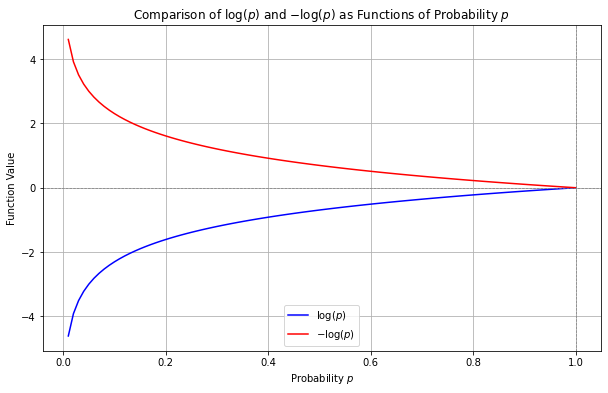

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the range of p values, avoiding p=0 to prevent undefined log
p_values = np.linspace(0.01, 1, 100)  # p ranges from 0.01 to 1

# Compute log(p) and -log(p) for each p
log_p = np.log(p_values)
neg_log_p = -np.log(p_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(p_values, log_p, label=r'$\log(p)$', color='blue')
plt.plot(p_values, neg_log_p, label=r'$-\log(p)$', color='red')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # x-axis
plt.axvline(1, color='gray', linestyle='--', linewidth=0.7)  # Vertical line at p=1

# Adding titles and labels
plt.title('Comparison of $\log(p)$ and $-\log(p)$ as Functions of Probability $p$')
plt.xlabel('Probability $p$')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Plot Exponential Function 

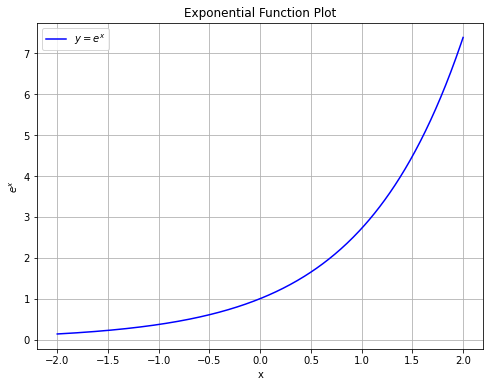

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-2, 2, 400)  # 400 points from -2 to 2

# Compute y = exp(x)
y = np.exp(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$y = e^{x}$', color='blue')

# Add titles and labels
plt.title('Exponential Function Plot')
plt.xlabel('x')
plt.ylabel(r'$e^{x}$')

# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

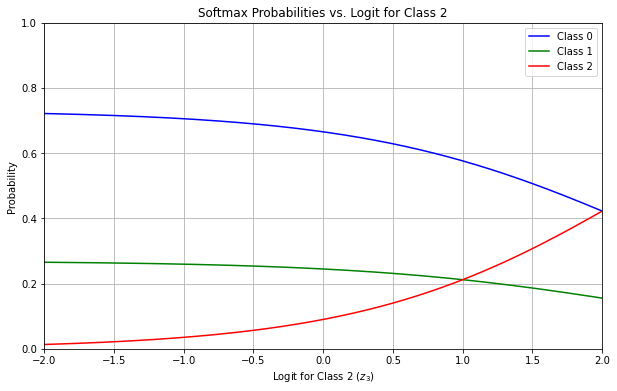

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    """
    Compute softmax probabilities for a list of logits.

    Args:
        z (np.array): Array of logits.

    Returns:
        np.array: Softmax probabilities.
    """
    # Subtract the max logit for numerical stability
    shift_z = z - np.max(z)
    exp_z = np.exp(shift_z)
    softmax_probs = exp_z / exp_z.sum()
    return softmax_probs

# Fixed logits for Class 0 and Class 1
z1 = 2.0  # Logit for Class 0
z2 = 1.0  # Logit for Class 1

# Variable logits for Class 2
z3_values = np.linspace(-2.0, 2.0, 400)  # 400 points from -2 to 2

# Containers to store softmax probabilities
prob_class0 = []
prob_class1 = []
prob_class2 = []

# Compute softmax probabilities for each z3
for z3 in z3_values:
    logits = np.array([z1, z2, z3])
    probs = softmax(logits)
    prob_class0.append(probs[0])
    prob_class1.append(probs[1])
    prob_class2.append(probs[2])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z3_values, prob_class0, label='Class 0', color='blue')
plt.plot(z3_values, prob_class1, label='Class 1', color='green')
plt.plot(z3_values, prob_class2, label='Class 2', color='red')

plt.title('Softmax Probabilities vs. Logit for Class 2')
plt.xlabel('Logit for Class 2 ($z_3$)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Probabilities range from 0 to 1
plt.xlim(-2, 2)  # Logit range

plt.show()